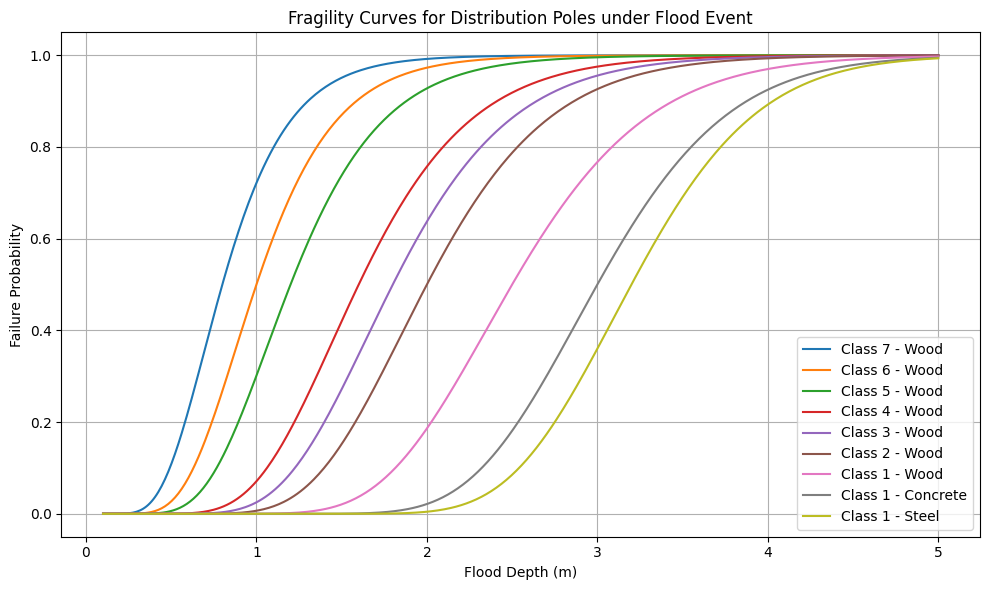

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define fragility parameters for distribution poles under flood event
pole_classes_flood = {
    "Class 7 - Wood": {"h_m": 0.8, "beta": 0.38},
    "Class 6 - Wood": {"h_m": 1.0, "beta": 0.36},
    "Class 5 - Wood": {"h_m": 1.2, "beta": 0.35},
    "Class 4 - Wood": {"h_m": 1.6, "beta": 0.32},
    "Class 3 - Wood": {"h_m": 1.8, "beta": 0.30},
    "Class 2 - Wood": {"h_m": 2.0, "beta": 0.28},
    "Class 1 - Wood": {"h_m": 2.5, "beta": 0.25},
    "Class 1 - Concrete": {"h_m": 3.0, "beta": 0.20},
    "Class 1 - Steel": {"h_m": 3.2, "beta": 0.18},
}

# Define water depth range (m)
flood_depths = np.linspace(0.1, 5.0, 500)

# Plot fragility curves under flood hazard
plt.figure(figsize=(10, 6))
for label, params in pole_classes_flood.items():
    h_m = params["h_m"]
    beta = params["beta"]
    fragility = norm.cdf((np.log(flood_depths) - np.log(h_m)) / beta)
    plt.plot(flood_depths, fragility, label=label)

plt.title("Fragility Curves for Distribution Poles under Flood Event")
plt.xlabel("Flood Depth (m)")
plt.ylabel("Failure Probability")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
##### Fragility curves from PNNL report
import numpy as np
import matplotlib.pyplot as plt

##### for pole (didn't justify pole class in the report)
def step_failure_probability_pole(h):
    if h < 2:
        return 0.0
    elif h < 6: 
        return 0.01
    else: 
        return 0.02
        
# Vectorize for array input
vectorized_pf = np.vectorize(step_failure_probability_pole)

# Example usage
h_values = np.linspace(0, 10, 11)
pf_values = vectorized_pf(h_values)


plt.figure(figsize=(8, 5))
plt.step(h_values, pf_values, where='post', label='Step Function')
plt.xlabel('Depth of Flood (Unit: ft)')
plt.ylabel('Failure Probability')
plt.ylim(0, 0.1)
plt.title('Stepwise Failure Probability Function for Poles')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
##### for substation
def linear_failure_probability_substation(h):
    if h < 3:
        return 0.02*h
    elif h < 7: 
        return 0.01*h+0.03
    elif h < 9:
        return 0.015*h-0.005
    else: 
        return 0.01*h+0.04
        
# Vectorize for array input
vectorized_pf = np.vectorize(linear_failure_probability_substation)

# Example usage
h_values = np.linspace(0, 10, 11)
pf_values = vectorized_pf(h_values)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(h_values, pf_values, label='Piecewise Linear Probability', color='blue')
plt.xlabel('Depth of Flood (Unit: ft)')
plt.ylabel('Failure Probability')
plt.ylim(0, 0.2)
plt.title('Piecewise Linear Failure Probability Function for Substations')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
##### for PV panel
def linear_failure_probability_PV(h):
    if h < 8:
        return 0.025*h
    else: 
        return 0.05*h-0.2
        
# Vectorize for array input
vectorized_pf = np.vectorize(linear_failure_probability_PV)

# Example usage
h_values = np.linspace(0, 10, 11)
pf_values = vectorized_pf(h_values)

plt.figure(figsize=(8, 5))
plt.plot(h_values, pf_values, label='Piecewise Linear Probability', color='blue')
plt.xlabel('Depth of Flood (Unit: ft)')
plt.ylabel('Failure Probability')
plt.ylim(0, 0.3)
plt.title('Piecewise Linear Failure Probability Function for PV Panels')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()